## 3.5　TensorFlow でのファーストステップ

In [1]:
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist

#### 3.5.1　定数テンソルと変数

In [2]:
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.2518238 ]
 [-0.32021943]
 [ 1.9753647 ]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1)
print(x)

tf.Tensor(
[[0.9543203 ]
 [0.10859108]
 [0.9278945 ]], shape=(3, 1), dtype=float32)


In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.9654774 ],
       [ 1.1580526 ],
       [-0.48342124]], dtype=float32)>


In [7]:
v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
v.assign_add(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


In [10]:
v.assign_sub(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

#### 3.5.2　テンソル演算：TensorFlow での算術演算

In [11]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### 3.5.3　GradientTape API

In [12]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [13]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [14]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### 3.5.4　TensorFlow で線形分離器を一から構築する

In [15]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

In [16]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), np.ones((num_samples_per_class, 1), dtype='float32')))
print(inputs.shape)
print(targets.shape)

(2000, 2)
(2000, 1)


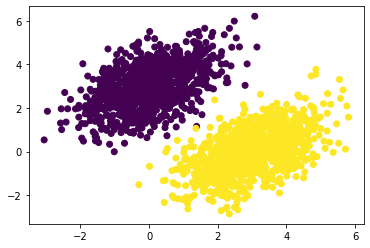

In [17]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [18]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(W.shape)
print(b.shape)

(2, 1)
(1,)


In [19]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [20]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [21]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
    
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [22]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f'Loss at step {step}: {loss:.4f}')

Loss at step 0: 0.2437
Loss at step 1: 0.0999
Loss at step 2: 0.0845
Loss at step 3: 0.0783
Loss at step 4: 0.0735
Loss at step 5: 0.0693
Loss at step 6: 0.0654
Loss at step 7: 0.0619
Loss at step 8: 0.0586
Loss at step 9: 0.0557
Loss at step 10: 0.0530
Loss at step 11: 0.0505
Loss at step 12: 0.0483
Loss at step 13: 0.0462
Loss at step 14: 0.0443
Loss at step 15: 0.0426
Loss at step 16: 0.0411
Loss at step 17: 0.0396
Loss at step 18: 0.0383
Loss at step 19: 0.0371
Loss at step 20: 0.0360
Loss at step 21: 0.0350
Loss at step 22: 0.0341
Loss at step 23: 0.0333
Loss at step 24: 0.0325
Loss at step 25: 0.0318
Loss at step 26: 0.0312
Loss at step 27: 0.0306
Loss at step 28: 0.0301
Loss at step 29: 0.0296
Loss at step 30: 0.0291
Loss at step 31: 0.0287
Loss at step 32: 0.0283
Loss at step 33: 0.0280
Loss at step 34: 0.0277
Loss at step 35: 0.0274
Loss at step 36: 0.0272
Loss at step 37: 0.0269
Loss at step 38: 0.0267
Loss at step 39: 0.0265


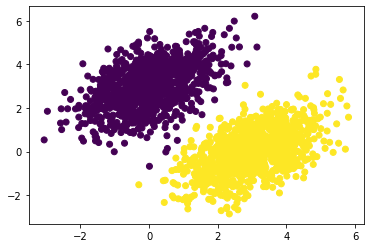

In [23]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

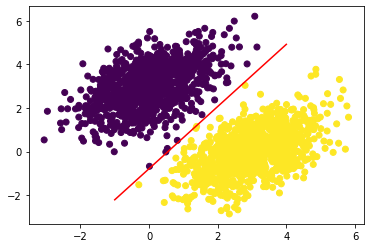

In [24]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)